In [ ]:
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertForSequenceClassification

# --- YOL AYARLARI ---
base_path = os.path.dirname(os.path.dirname(os.getcwd()))
data_path = os.path.join(base_path, "data", "processed", "diplomacy")
model_dir = os.path.join(base_path, "models", "deceptency")

# --- VERİ YÜKLEME ---
train_df = pd.read_parquet(os.path.join(data_path, "train_processed.parquet"))
test_df = pd.read_parquet(os.path.join(data_path, "test_processed.parquet"))

X_test = test_df.drop(columns=['target']) 
y_test = test_df['target'].values

# --- GÖRSELLEŞTİRME FONKSİYONU ---
def evaluate_model(y_test, y_pred, model_name="Model"):
    print(f"\n--- {model_name} Results ---")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Truth', 'Deception']))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Truth', 'Deception'], yticklabels=['Truth', 'Deception'])
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

Path: c:\work environment\Projects\amazon-spam-review\models\deceptency\logistic_regression_diplomacy.pkl

--- Logistic Regression Results ---

Classification Report:
              precision    recall  f1-score   support

       Truth       0.92      0.82      0.87      2501
   Deception       0.13      0.28      0.18       240

    accuracy                           0.77      2741
   macro avg       0.53      0.55      0.52      2741
weighted avg       0.85      0.77      0.81      2741



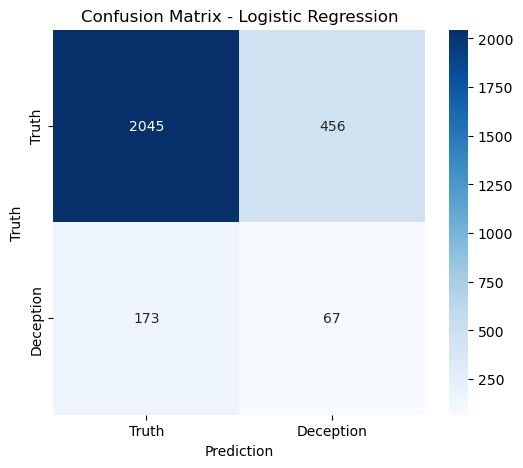

In [3]:
# --- LOGISTIC REGRESSION ---
path = os.path.join(model_dir, "logistic_regression_diplomacy.pkl")
print(f"Path: {path}")
model = joblib.load(path)

# Pipeline olduğu için tüm DataFrame'i (X_test) veriyoruz
y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred, "Logistic Regression")

Yükleniyor: c:\work environment\Projects\amazon-spam-review\models\deceptency\naive_bayes_deceptency.pkl

--- Naive Bayes Results ---

Classification Report:
              precision    recall  f1-score   support

       Truth       0.91      0.75      0.83      2501
   Deception       0.09      0.26      0.14       240

    accuracy                           0.71      2741
   macro avg       0.50      0.51      0.48      2741
weighted avg       0.84      0.71      0.77      2741



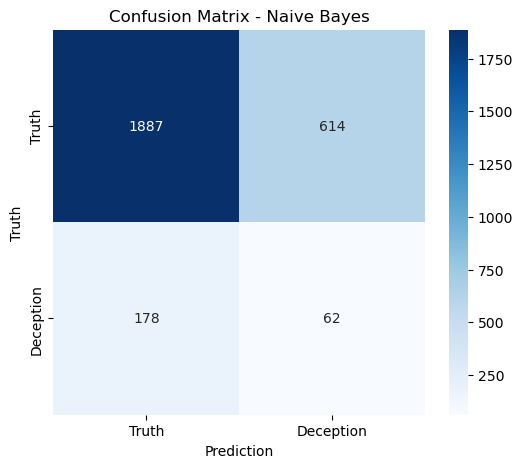

In [4]:
# --- NAIVE BAYES ---
path = os.path.join(model_dir, "naive_bayes_deceptency.pkl")
print(f"Yükleniyor: {path}")
model = joblib.load(path)

y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred, "Naive Bayes")

Path: c:\work environment\Projects\amazon-spam-review\models\deceptency\svm_diplomacy.pkl

--- SVM Results ---

Classification Report:
              precision    recall  f1-score   support

       Truth       0.93      0.92      0.92      2501
   Deception       0.23      0.25      0.24       240

    accuracy                           0.86      2741
   macro avg       0.58      0.58      0.58      2741
weighted avg       0.87      0.86      0.86      2741



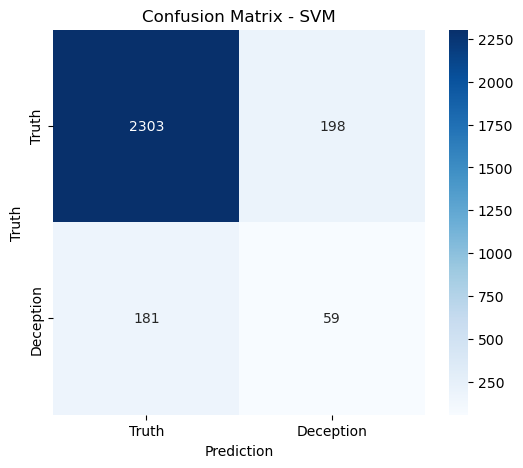

In [5]:
# --- SVM ---
path = os.path.join(model_dir, "svm_diplomacy.pkl")
print(f"Path: {path}")
model = joblib.load(path)

y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred, "SVM")

Yükleniyor: c:\work environment\Projects\amazon-spam-review\models\deceptency\random_forest_diplomacy.pkl

--- Random Forest Results ---

Classification Report:
              precision    recall  f1-score   support

       Truth       0.91      1.00      0.95      2501
   Deception       0.33      0.02      0.03       240

    accuracy                           0.91      2741
   macro avg       0.62      0.51      0.49      2741
weighted avg       0.86      0.91      0.87      2741



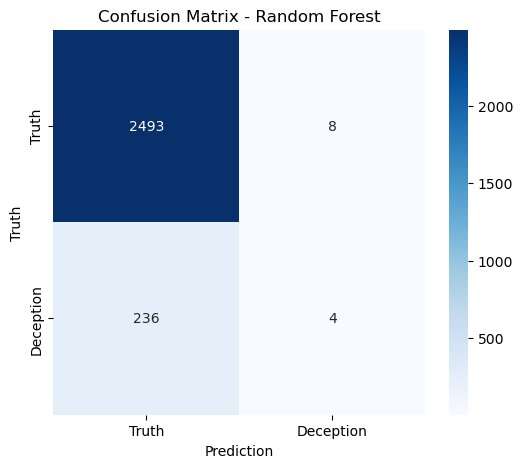

In [6]:
# --- RANDOM FOREST ---
path = os.path.join(model_dir, "random_forest_diplomacy.pkl")
print(f"Yükleniyor: {path}")
model = joblib.load(path)

y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred, "Random Forest")

Yükleniyor: c:\work environment\Projects\amazon-spam-review\models\deceptency\lightgbm_diplomacy.pkl


c:\Users\Aybars\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- LightGBM Results ---

Classification Report:
              precision    recall  f1-score   support

       Truth       0.91      0.99      0.95      2501
   Deception       0.33      0.03      0.05       240

    accuracy                           0.91      2741
   macro avg       0.62      0.51      0.50      2741
weighted avg       0.86      0.91      0.87      2741



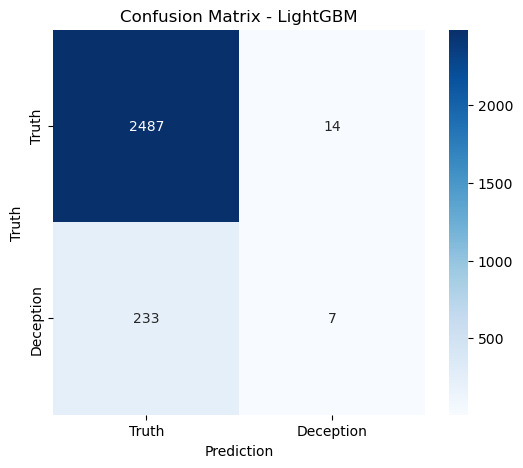

In [7]:
# --- LIGHTGBM ---
path = os.path.join(model_dir, "lightgbm_diplomacy.pkl")
print(f"Yükleniyor: {path}")
model = joblib.load(path)

y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred, "LightGBM")

Yükleniyor: c:\work environment\Projects\amazon-spam-review\models\deceptency\neural_network_diplomacy.pkl

--- Neural Network Results ---

Classification Report:
              precision    recall  f1-score   support

       Truth       0.92      0.94      0.93      2501
   Deception       0.15      0.11      0.13       240

    accuracy                           0.87      2741
   macro avg       0.53      0.53      0.53      2741
weighted avg       0.85      0.87      0.86      2741



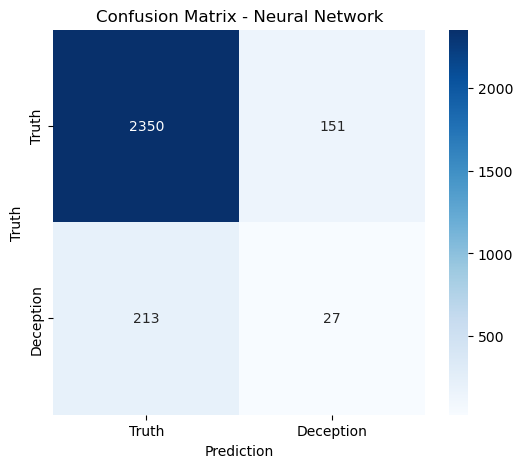

In [8]:
# --- NEURAL NETWORK ---
path = os.path.join(model_dir, "neural_network_diplomacy.pkl")
print(f"Yükleniyor: {path}")
model = joblib.load(path)

y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred, "Neural Network")

Loading: c:\work environment\Projects\amazon-spam-review\models\deceptency\lstm_diplomacy.h5


86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step

--- LSTM Results ---

Classification Report:
              precision    recall  f1-score   support

       Truth       0.92      0.78      0.84      2501
   Deception       0.12      0.31      0.17       240

    accuracy                           0.74      2741
   macro avg       0.52      0.54      0.51      2741
weighted avg       0.85      0.74      0.78      2741



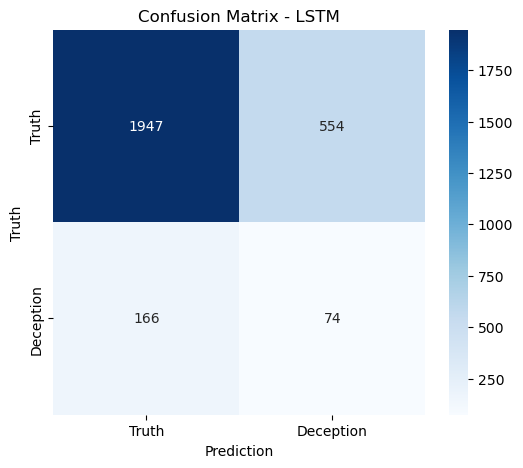

In [9]:
# --- LSTM MODEL ---
path = os.path.join(model_dir, "lstm_diplomacy.h5")
print(f"Loading: {path}")

# Tokenizer ve Padding (LSTM özel)
VOCAB_SIZE = 10000
MAX_LEN = 150
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['message_text']) 

X_test_seq = tokenizer.texts_to_sequences(test_df['message_text'])
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

# Model Yükleme ve Tahmin
model = load_model(path)
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

evaluate_model(y_test, y_pred, "LSTM")

Loading: c:\work environment\Projects\amazon-spam-review\models\deceptency\bert_diplomacy



TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at c:\work environment\Projects\amazon-spam-review\models\deceptency\bert_diplomacy.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


86/86 [==============================] - 166s 2s/step

--- BERT Results ---

Classification Report:
              precision    recall  f1-score   support

       Truth       0.93      0.74      0.82      2501
   Deception       0.13      0.42      0.20       240

    accuracy                           0.71      2741
   macro avg       0.53      0.58      0.51      2741
weighted avg       0.86      0.71      0.77      2741



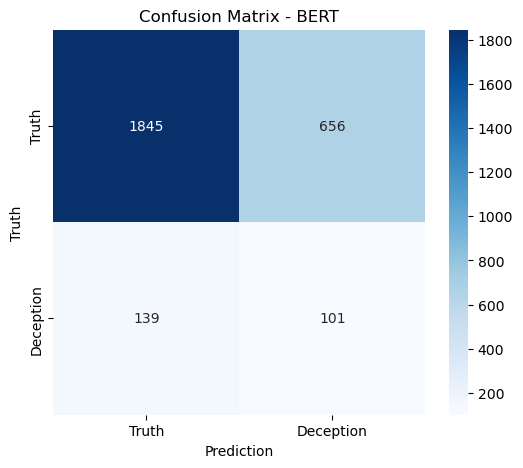

In [10]:
# --- BERT MODEL ---
path = os.path.join(model_dir, "bert_diplomacy")
print(f"Loading: {path}")

# Tokenizer (BERT özel)
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
MAX_LEN_BERT = 128

def encode_bert(texts):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded = bert_tokenizer.encode_plus(
            text, add_special_tokens=True, max_length=MAX_LEN_BERT,
            padding='max_length', truncation=True,
            return_attention_mask=True, return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'][0])
        attention_masks.append(encoded['attention_mask'][0])
    return np.array(input_ids), np.array(attention_masks)

X_test_ids, X_test_masks = encode_bert(test_df['message_text'])

# Model Yükleme ve Tahmin
model = TFBertForSequenceClassification.from_pretrained(path)
y_pred_logits = model.predict([X_test_ids, X_test_masks]).logits
y_pred_prob = tf.sigmoid(y_pred_logits).numpy().flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

evaluate_model(y_test, y_pred, "BERT")


--- ENSEMBLE MODEL EVALUATION ---
Ensemble için yükleniyor: Logistic Regression...
Ensemble için yükleniyor: Naive Bayes...
Ensemble için yükleniyor: SVM...
Ensemble için yükleniyor: Random Forest...
Ensemble için yükleniyor: LightGBM...


c:\Users\Aybars\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Ensemble için yükleniyor: MLP...

6 model ile oylama yapılıyor: ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'LightGBM', 'MLP']

--- Ensemble (Soft Voting) Results ---

Classification Report:
              precision    recall  f1-score   support

       Truth       0.91      0.98      0.95      2501
   Deception       0.22      0.05      0.08       240

    accuracy                           0.90      2741
   macro avg       0.57      0.52      0.51      2741
weighted avg       0.85      0.90      0.87      2741



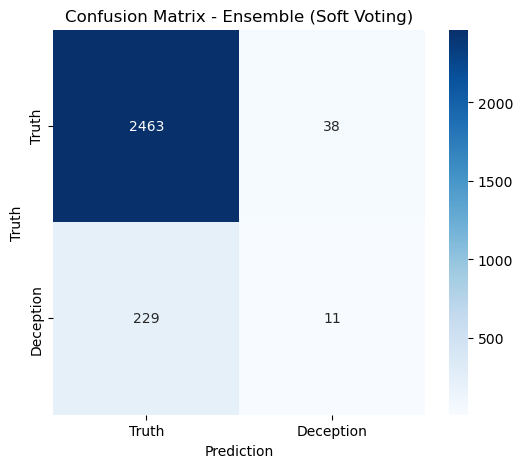

In [ ]:
# --- ENSEMBLE (SOFT VOTING - RELOAD & PREDICT) ---
print("\n--- ENSEMBLE MODEL EVALUATION ---")

ensemble_files = {
    'Logistic Regression': 'logistic_regression_diplomacy.pkl',
    'Naive Bayes': 'naive_bayes_deceptency.pkl',
    'SVM': 'svm_diplomacy.pkl',
    'Random Forest': 'random_forest_diplomacy.pkl',
    'LightGBM': 'lightgbm_diplomacy.pkl',
    'MLP': 'neural_network_diplomacy.pkl'
}

all_probs = []
valid_models = []

for name, filename in ensemble_files.items():
    path = os.path.join(model_dir, filename)
    if os.path.exists(path):
        try:
            model_tmp = joblib.load(path)
            
            probs = model_tmp.predict_proba(X_test)
            all_probs.append(probs)
            valid_models.append(name)
        except Exception as e:
            print(f"HATA: {name} modeli kullanılamadı: {e}")

if all_probs:
    avg_probs = np.mean(all_probs, axis=0)
    y_pred_ensemble = np.argmax(avg_probs, axis=1)

    try:
        evaluate_model(y_test, y_pred_ensemble, "Ensemble (Soft Voting)")
    except NameError:
        from sklearn.metrics import classification_report, confusion_matrix
        print(classification_report(y_test, y_pred_ensemble, target_names=['Truth', 'Deception']))
else:
    print("Ensemble için hiçbir model yüklenemedi!")